# IS460-G2 Machine Learning & Applications

## Project Topic: Classification and Prediction of Pneumonia from Chest X-Ray Images

### Logistic Regression

#### Group 7: Shaun, Shan Mei, Xiao Xiao, Xiao Fang, Matthew, Tun Hao
 
 Following the Severe Pneumonia clusters that raised questions on accuracy and precision of pneumonia diagnosis during the COVID pandemic, this project aims to accurately identify and diagnose pneumonia patients through image classification and explore other methods of building machine learning algorithms to solve the problem.
 
(https://www.straitstimes.com/singapore/health/all-pneumonia-patients-in-public-hospitals-here-being-tested-for-coronavirus-moh) 

### Install Packages

In [1]:
# # Run Once
# !pip install opencv-python
# !pip install tensorflow
# !pip install --upgrade scikit-image
# !pip install numpy scikit-learn

# import skimage
# print(skimage.__version__)

### Import Packages

In [26]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

### Import Dataset

In [4]:
df = pd.read_excel("numerical_chestxray_values.xlsx")

df.head()

,Mean,Std,Skewness,Kurtosis,GLCM_Contrast,GLCM_Correlation,Hist_Skewness,Label
0,128.727031,62.232021,-0.453478,2.199526,390.416139,0.948514,-0.069868,0
1,100.611094,59.884171,-0.034412,2.012165,499.194620,0.928829,11.886041,0
2,121.801563,68.709242,-0.472228,2.060992,358.495253,0.960998,13.268825,0
3,132.965156,64.893443,-0.680736,2.334244,325.409335,0.960163,0.534510,0
4,106.217656,65.075876,-0.219956,1.910755,625.791139,0.924702,14.198189,0


### Exploratory Data Analysis

#### Correlation Analysis  
We begin the Data Analysis by using Correlation Analysis to make sure that the building of the model later on will have effective hyperparameter tuning. Correlation Analysis allows us to identify if there is any variables that are highly correlated with one another.

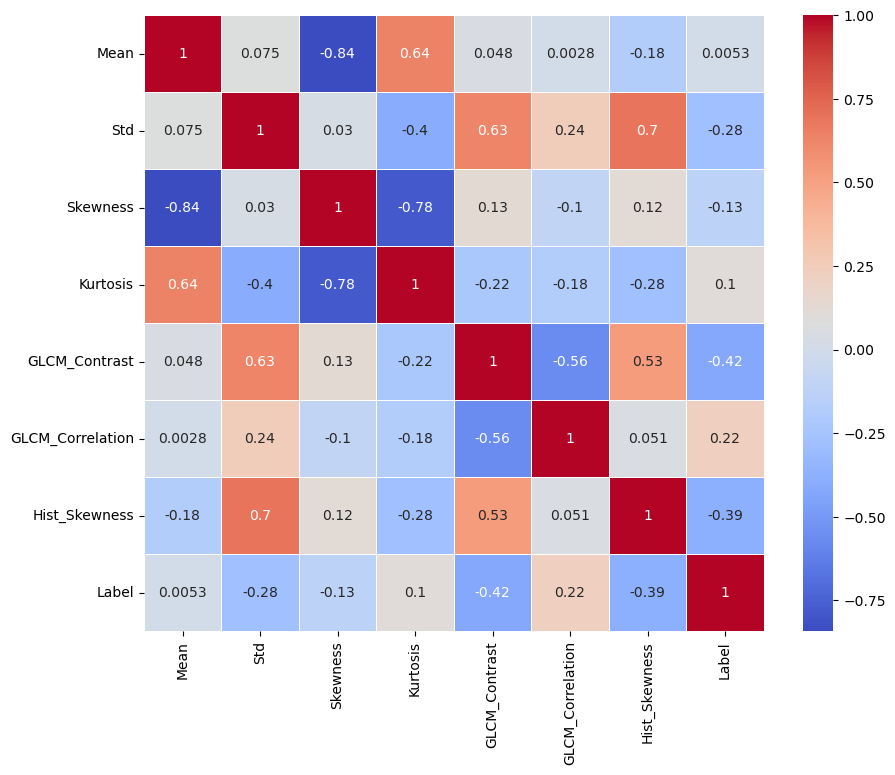

In [21]:
# Create correlation matrix
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.show()

#### Data Visualization  
As there are no variables that are highly correlated with one another (Correlation > 0.9), we proceed to visualize the independent variables against the target to see if there is any dimensionality reduction we can do.

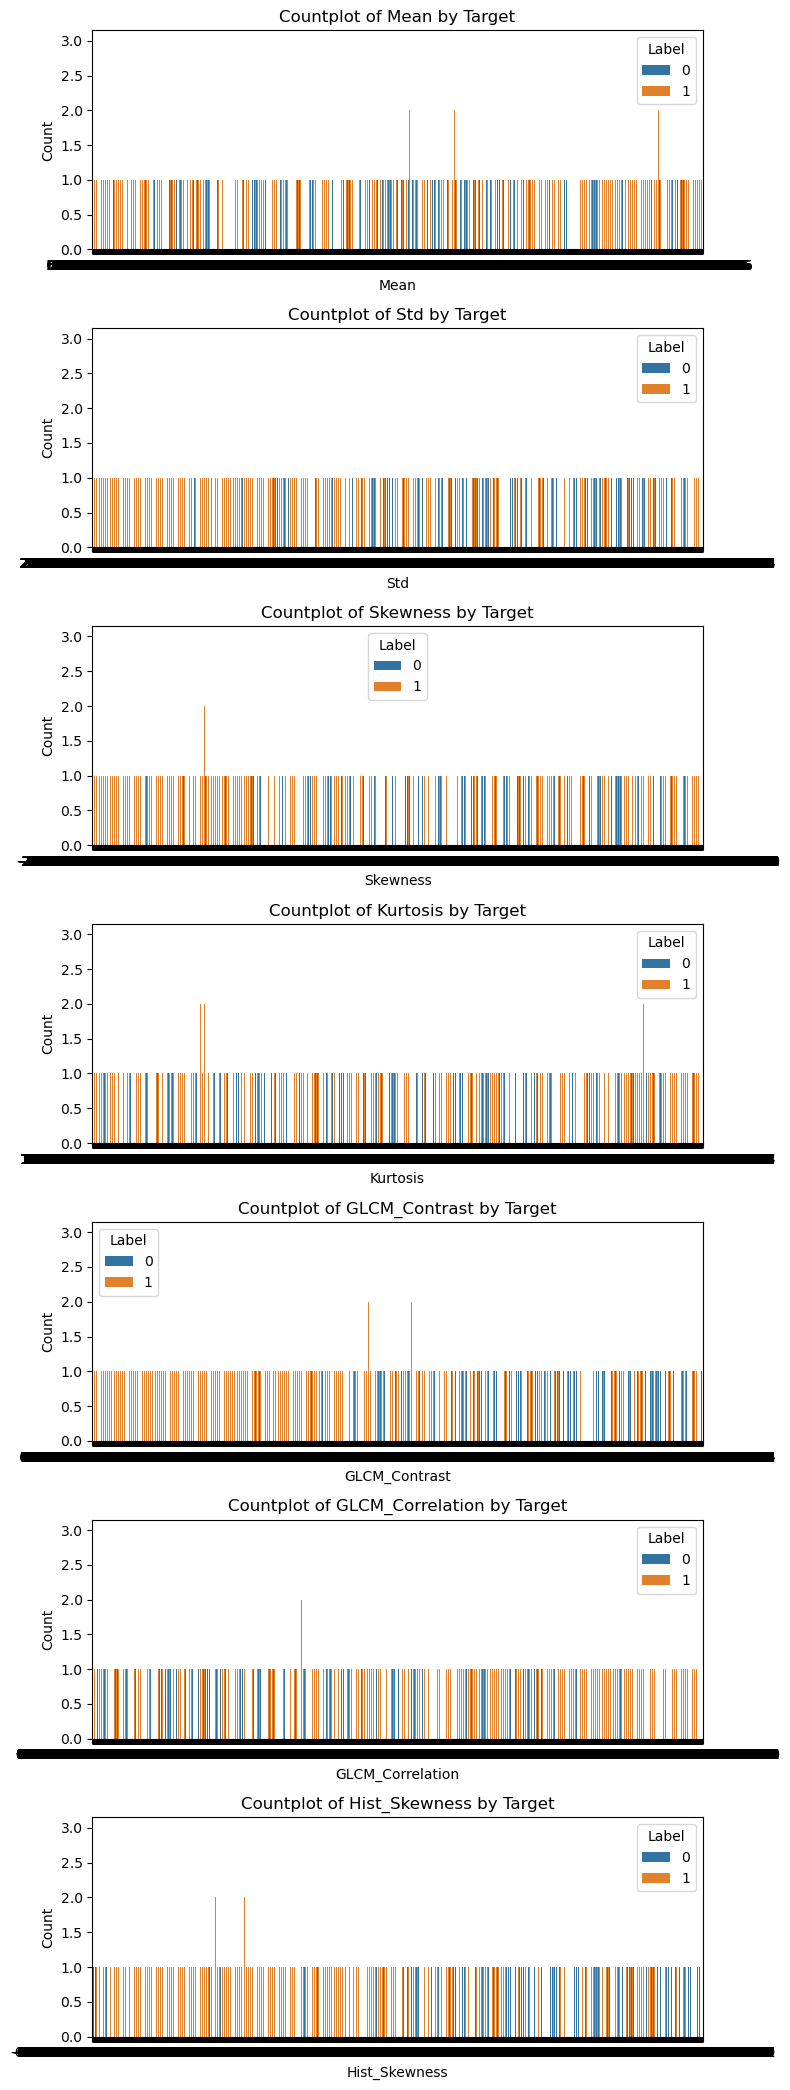

In [25]:
# Separate the features (independent variables) and the target variable
X = df.drop('Label', axis=1)
y = df['Label']

# Create subplots for each feature
fig, axes = plt.subplots(nrows=len(X.columns), ncols=1, figsize=(8, 3 * len(X.columns)))

for i, col in enumerate(X.columns):
    sns.countplot(x=col, hue='Label', data=df, ax=axes[i])
    axes[i].set_title(f'Countplot of {col} by Target')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

### Implementation of Logistic Regression

To begin the Modelling, we split our data into Training, Validation and Test sets.

In [7]:
# Initial Train-Test Split
X_train, X_test2, y_train, y_test2 = train_test_split(X, y, test_size=0.30, random_state=460, shuffle =True)

# Further split Test data into Validation and Test Sets
X_val, X_test, y_val, y_test = train_test_split(X_test2, y_test2, test_size=0.33, random_state=460, shuffle =True)

We standardize our values to allow for easier convergence of optimization later on in the hyperparameter tuning. It also gives all the features equal importance.

In [11]:
# Standardize features as our Output has values 0 or 1
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
X_val = scaler.fit_transform(X_val)

In [17]:
# lgfgs is the default solver, suitable for medium to large dataset, less memory consuming. 
log_reg = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=1000)

# Initialize and train the Logistic Regression
log_reg.fit(X_train, y_train)

# Make predictions
y_pred = log_reg.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7858963466440102


#### Hyperparameter Tuning

In logistic regression, the primary hyperparameter to tune is the regularization strength, often represented by C. You can choose between L1 regularization or L2 regularization, which is controlled by the penalty hyperparameter.

In [27]:
# Define Hyperparameter grid
param_grid = {
    'var_smoothing': [1e-10, 1e-9, 1e-8, 1e-7],
    'priors': [None, [0.5,0.5], [0.7,0.3], [0.9,0.1]]
}

# Perform Grid Search with Cross-Validation (cv=5)
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best Hyperparameters
best_params = grid_search.best_params_

best_params

{'priors': None, 'var_smoothing': 1e-10}

However, these best_params proved to have been overfitting the model. We can conclude that although Naive Bayes is not technically a very reliable model for this image classification problem, it could also be that insufficient numerical features were extracted to make an accurate prediction.

In [28]:
# Train Model on Combined Training & Validation Data
X_train_val = np.concatenate((X_train, X_val), axis=0)
y_train_val = np.concatenate((y_train, y_val), axis=0)

# Create a new GNB model with the tuned hyperparameters
model_tuned = GaussianNB(priors=None, var_smoothing = 1e-10)

# Train the new GNB model on the combined training and validation data
model_tuned.fit(X_train_val, y_train_val)

# Make predictions
y_pred1 = model_tuned.predict(X_test)

# Evaluate the model on the test set
accuracy1 = accuracy_score(y_test, y_pred1)
print("Accuracy on test set:", accuracy1)

Accuracy on test set: 0.7551724137931034


#### Evaluate Model on Test Set

The evaluation will be done on a confusion matrix to visualize the Precision, Accuracy and Recall of the model.

_Evaluate initial model (Pre-Hyperparameter Tuning) with better scores on test set._

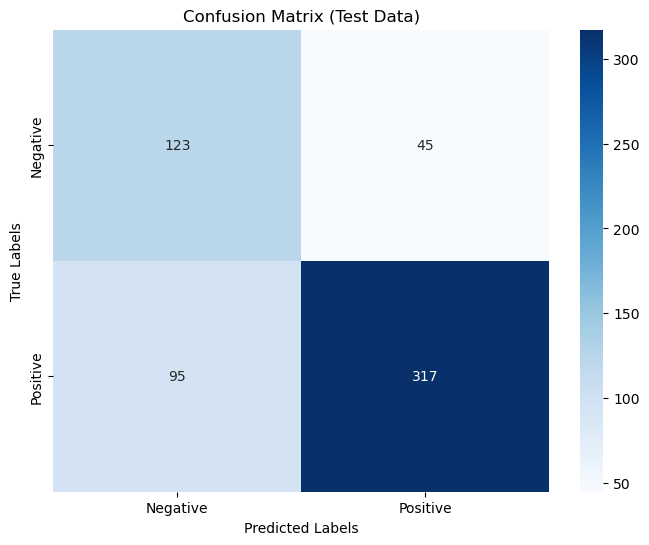

Accuracy: 0.7586206896551724
Precision: 0.8756906077348067
Recall: 0.7694174757281553
F1-Score: 0.8191214470284238
Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.73      0.64       168
           1       0.88      0.77      0.82       412

    accuracy                           0.76       580
   macro avg       0.72      0.75      0.73       580
weighted avg       0.79      0.76      0.77       580



In [29]:
# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate metrics
TP = np.sum((y_test == 1) & (y_pred == 1))
FP = np.sum((y_test == 0) & (y_pred == 1))
TN = np.sum((y_test == 0) & (y_pred == 0))
FN = np.sum((y_test == 1) & (y_pred == 0))

# Accuracy
accuracy = (TP + TN) / (TP + TN + FP + FN)

# Precision
precision = TP / (TP + FP)

# Recall (Sensitivity)
recall = TP / (TP + FN)

# F1-Score
f1_score = 2 * (precision * recall) / (precision + recall)

# Print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Negative", "Positive"],
            yticklabels=["Negative", "Positive"])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Test Data)')
plt.show()

# Print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1_score)

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

_Evaluate tuned model (After Hyperparameter Tuning) with worse scores on test set._

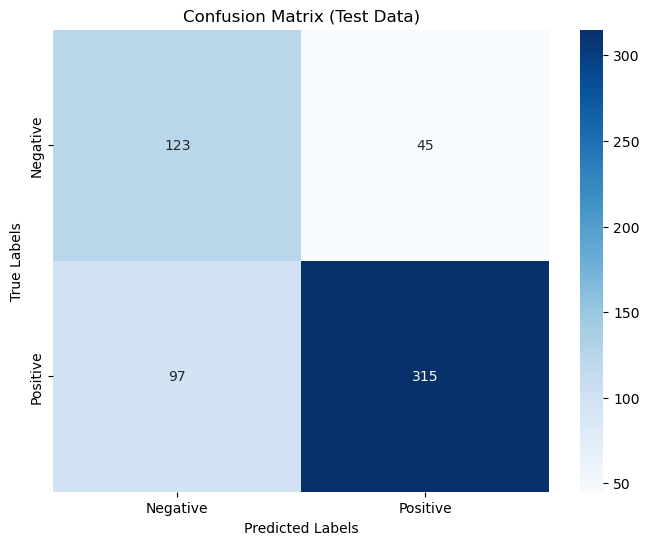

Accuracy: 0.7551724137931034
Precision: 0.875
Recall: 0.7645631067961165
F1-Score: 0.8160621761658031
Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.73      0.63       168
           1       0.88      0.76      0.82       412

    accuracy                           0.76       580
   macro avg       0.72      0.75      0.73       580
weighted avg       0.78      0.76      0.76       580



In [30]:
# Make predictions on the test data
y_pred_tuned = model_tuned.predict(X_test)

# Calculate metrics
TP = np.sum((y_test == 1) & (y_pred_tuned == 1))
FP = np.sum((y_test == 0) & (y_pred_tuned == 1))
TN = np.sum((y_test == 0) & (y_pred_tuned == 0))
FN = np.sum((y_test == 1) & (y_pred_tuned == 0))

# Accuracy
accuracy = (TP + TN) / (TP + TN + FP + FN)

# Precision
precision = TP / (TP + FP)

# Recall (Sensitivity)
recall = TP / (TP + FN)

# F1-Score
f1_score = 2 * (precision * recall) / (precision + recall)

# Print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_tuned)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Negative", "Positive"],
            yticklabels=["Negative", "Positive"])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Test Data)')
plt.show()

# Print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1_score)

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred_tuned))